# The Moran Process


This process describes the dynamics of a population of $N$ interacting species $X_i$ governed by the reactions


$$
X_i+X_j\xrightarrow{\alpha_i}2X_i
$$

this means species $X_i$ eats species $X_j$ and replicates immediately, which conserves the number of individuals in the total population. 

The Moran process is driven by the associated chemical Master equation for the state $\mathbf{n}(t)$ of the system that is defined by the number of individuals $n_i(t)$ of species $X_i$ in the population.

Parameters to specify are the replication rates $\alpha_i$ and the conserved population size $N$. 

In the limit $N\rightarrow\infty$ the dynamics for the fraction of species is governed by the replicator equation

$$
\dot x_i = x_i(\alpha_i-\phi)
$$

with $\phi=\sum_k x_i \alpha_i$.

## The diffusion approximation

In the limit of large population size $N$ the dynamics of the Moran process can be approximated by a diffusion process:

$$
dx_{i}=x_{i}(\alpha_{i}-\phi)dt+\frac{1}{\sqrt{N}}\sum_{j}\sqrt{x_{i}x_{j}}\left(\sqrt{\alpha_{i}}dW_{ij}-\sqrt{\alpha_{j}}dW_{ji}\right).
$$

where $dW_{ij}$ are independent increments of the Wiener process and $x_i(t)=n_i(t)/N$ are the fraction of species $i$ in the population.


The function ```moran``` in the package can do both, solve the particle kinectic, discrete population process, as well as the diffusion approximation. You can do this by setting the keyword ```diffusion_approximation=True```.


In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from stopro import moran
from math import inf

## This is just for colors of the plots
from palettable.wesanderson import GrandBudapest3_6
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=GrandBudapest3_6.mpl_colors)
## --------

In [6]:
n0 = np.array([100,200,300]) # initial number of individuals of each species
alpha = np.array([3,2,1]) # replication rates of each species
T = 10 # integration time
samples = 5 # number of samples
# here are the realizations of the moran process
res = moran(T,n0,alpha,samples=samples,normalize=True)
ode = moran(T,n0,alpha,samples=samples,system_size=inf,dt=0.05)

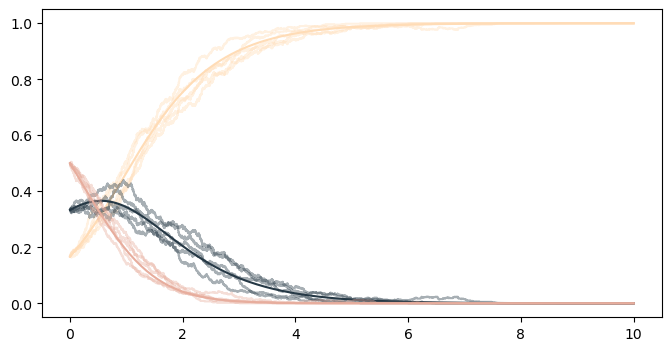

In [7]:
fig,ax = plt.subplots(figsize=[8,4])
t0 = ode[0]
X0 = np.array(ode[1]).T

for i in range(len(n0)):
    ax.plot(t0,X0[i],color='C'+str(i))
    for s in range(samples):
        t = res[s][0]
        X = np.array(res[s][1]).T    
        ax.plot(t,X[i],color='C'+str(i),alpha=0.4)

## Here's the diffusion approximation with the same parameters:

In [8]:
n0 = np.array([100,200,300]) # initial number of individuals of each species
alpha = np.array([3,2,1]) # replication rates of each species
T = 10 # integration time
samples = 5 # number of samples
# here are the realizations of the moran process
res = moran(T,n0,alpha,samples=samples,normalize=True,diffusion_approximation=True,dt=0.05)
ode = moran(T,n0,alpha,samples=samples,system_size=inf,dt=0.05)


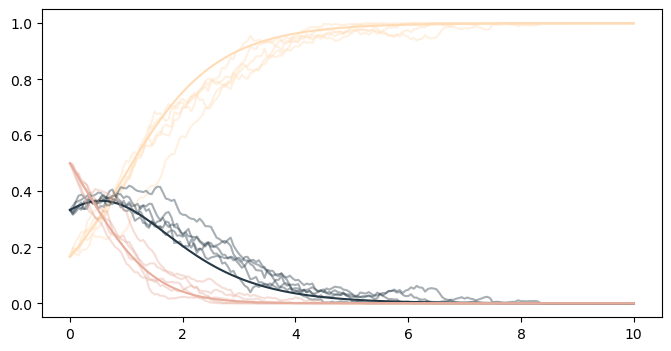

In [9]:
fig,ax = plt.subplots(figsize=[8,4])
t0 = ode[0]
X0 = np.array(ode[1]).T

for i in range(len(n0)):
    ax.plot(t0,X0[i],color='C'+str(i))
    for s in range(samples):
        t = res[s][0]
        X = np.array(res[s][1]).T    
        ax.plot(t,X[i],color='C'+str(i),alpha=0.4)

In [11]:

n0 = np.array([1,1,1]) # initial number of individuals of each species
alpha = np.array([2,2,2]) # replication rates of each species
T = 100 # integration time
samples = 50 # number of samples
# here are the realizations of the moran process
res = moran(T,n0,alpha,samples=samples,normalize=True,system_size=100)


[33 33 33]


Text(0.5, 0, '$t$')

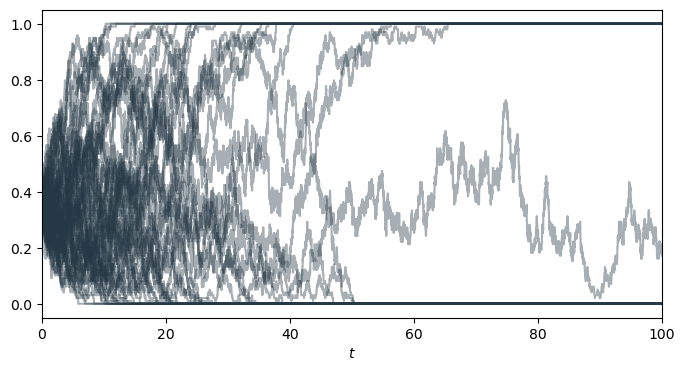

In [13]:
fig,ax = plt.subplots(figsize=[8,4])

for s in range(samples):
    t = res[s][0]
    X = np.array(res[s][1]).T    
    ax.plot(t,X[0],color='C'+str(1),alpha=0.4)
        
ax.set_xlim([0,T])
ax.set_xlabel(r'$t$')

